In [2]:
import zipfile
import pandas as pd

# Define the path to the zip files
zip_file_path_5 = 'C:/Users/anjup/MSinAI/Team Project/archive (5).zip'
zip_file_path_6 = 'C:/Users/anjup/MSinAI/Team Project/archive (6).zip'

# Step 1: Extract only the CSV files without full extraction
with zipfile.ZipFile(zip_file_path_5, 'r') as zip_ref:
    # List the contents of the zip file
    file_list_5 = zip_ref.namelist()
    print(file_list_5)
    
    # Extract a specific CSV file as a file-like object
    with zip_ref.open('Australia_Grocery_2022Sep.csv') as file_5:
        # Read the CSV file in chunks
        chunk_size = 10000  # Number of rows to read per chunk
        for chunk in pd.read_csv(file_5, chunksize=chunk_size):
            # Filter based on 'RunDate' or another condition
            # Example: Filter by a specific date range or some other condition
            filtered_chunk = chunk[chunk['RunDate'] == '2022-09-01']
            if not filtered_chunk.empty:
                print(filtered_chunk.head())  # Process this chunk (e.g., append to a list)

with zipfile.ZipFile(zip_file_path_6, 'r') as zip_ref:
    # List the contents of the zip file
    file_list_6 = zip_ref.namelist()
    print(file_list_6)
    
    # Extract a specific CSV file as a file-like object
    with zip_ref.open('synthethic_time_point.csv') as file_6:
        # Read the CSV file in chunks
        for chunk in pd.read_csv(file_6, chunksize=chunk_size):
            # Filter based on 'RunDate' or another condition
            filtered_chunk = chunk[chunk['RunDate'] == '2022-09-01']
            if not filtered_chunk.empty:
                print(filtered_chunk.head())  # Process this chunk


['Australia_Grocery_2022Sep.csv']
['synthethic_time_point.csv']


In [3]:
# Modify this line to match the correct date format
filtered_chunk = chunk[chunk['RunDate'] == '2022-09-01']  # Adjust if necessary


In [4]:
# Check the column names for both datasets
with zipfile.ZipFile(zip_file_path_5, 'r') as zip_ref:
    with zip_ref.open('Australia_Grocery_2022Sep.csv') as file_5:
        chunk = pd.read_csv(file_5, nrows=100)  # Read only the first 100 rows
        print("Australia_Grocery_2022Sep.csv columns:", chunk.columns)

with zipfile.ZipFile(zip_file_path_6, 'r') as zip_ref:
    with zip_ref.open('synthethic_time_point.csv') as file_6:
        chunk = pd.read_csv(file_6, nrows=100)  # Read only the first 100 rows
        print("synthethic_time_point.csv columns:", chunk.columns)


Australia_Grocery_2022Sep.csv columns: Index(['index', 'Postal_code', 'Category', 'Sub_category', 'Product_Group',
       'Product_Name', 'Package_price', 'Price_per_unit', 'package_size',
       'is_estimated', 'is_special', 'in_stock', 'Retail_price', 'Product_Url',
       'Brand', 'Sku', 'RunDate', 'unit_price', 'unit_price_unit', 'state',
       'city', 'tid'],
      dtype='object')
synthethic_time_point.csv columns: Index(['Unnamed: 0', 'Sku', 'city', 'Package_price', 'RunDate'], dtype='object')


In [5]:
import pandas as pd

# Initialize lists to hold filtered data from both files
filtered_data_5 = []
filtered_data_6 = []

# Process Australia_Grocery_2022Sep.csv
with zipfile.ZipFile(zip_file_path_5, 'r') as zip_ref:
    with zip_ref.open('Australia_Grocery_2022Sep.csv') as file_5:
        chunk_size = 10000  # Number of rows to read per chunk
        for chunk in pd.read_csv(file_5, chunksize=chunk_size):
            # Convert RunDate to date format by removing time part
            chunk['RunDate'] = pd.to_datetime(chunk['RunDate']).dt.date
            # Filter based on 'RunDate'
            filtered_chunk = chunk[chunk['RunDate'] == pd.to_datetime('2022-11-09').date()]
            if not filtered_chunk.empty:
                filtered_data_5.append(filtered_chunk)

# Process synthethic_time_point.csv
with zipfile.ZipFile(zip_file_path_6, 'r') as zip_ref:
    with zip_ref.open('synthethic_time_point.csv') as file_6:
        for chunk in pd.read_csv(file_6, chunksize=chunk_size):
            # Convert RunDate to date format
            chunk['RunDate'] = pd.to_datetime(chunk['RunDate']).dt.date
            # Filter based on 'RunDate'
            filtered_chunk = chunk[chunk['RunDate'] == pd.to_datetime('2022-11-09').date()]
            if not filtered_chunk.empty:
                filtered_data_6.append(filtered_chunk)

# Concatenate all chunks into a single DataFrame for both datasets
df_5 = pd.concat(filtered_data_5, ignore_index=True)
df_6 = pd.concat(filtered_data_6, ignore_index=True)

# Merge the two DataFrames based on 'RunDate' or another common column
merged_df = pd.merge(df_5, df_6, on=['RunDate', 'Sku', 'city'], how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())


   index  Postal_code        Category Sub_category    Product_Group  \
0      0         2044  Meat & seafood      Poultry    Chicken offal   
1      1         2044  Meat & seafood      Poultry    Chicken offal   
2      2         2044  Meat & seafood      Poultry    Chicken offal   
3      3         2044  Meat & seafood      Poultry    Chicken offal   
4      4         2044  Meat & seafood      Poultry  Crumbed chicken   

                          Product_Name  Package_price_x Price_per_unit  \
0         RSPCA Approved Chicken Necks             7.15  $6.50 per 1Kg   
1        RSPCA Approved Chicken Livers             5.40  $9.00 per 1Kg   
2       RSPCA Approved Chicken Giblets             4.50  $7.50 per 1Kg   
3        RSPCA Approved Chicken Frames             3.38  $4.50 per 1Kg   
4  RSPCA Chicken Schnitzel Plain Crumb            10.50  $8.75 per 1Kg   

        package_size  is_estimated  ...  Brand       Sku     RunDate  \
0      approx. 1.1kg             1  ...  Coles  1491280P

In [6]:
# Drop unnecessary columns (e.g., '_x' or '_y' suffixes)
cleaned_df = merged_df.drop(columns=['Package_price_y', 'Unnamed: 0'])

# Optionally, rename the remaining columns for clarity
cleaned_df = cleaned_df.rename(columns={'Package_price_x': 'Package_price'})

# Display the cleaned DataFrame
print(cleaned_df.head())


   index  Postal_code        Category Sub_category    Product_Group  \
0      0         2044  Meat & seafood      Poultry    Chicken offal   
1      1         2044  Meat & seafood      Poultry    Chicken offal   
2      2         2044  Meat & seafood      Poultry    Chicken offal   
3      3         2044  Meat & seafood      Poultry    Chicken offal   
4      4         2044  Meat & seafood      Poultry  Crumbed chicken   

                          Product_Name  Package_price Price_per_unit  \
0         RSPCA Approved Chicken Necks           7.15  $6.50 per 1Kg   
1        RSPCA Approved Chicken Livers           5.40  $9.00 per 1Kg   
2       RSPCA Approved Chicken Giblets           4.50  $7.50 per 1Kg   
3        RSPCA Approved Chicken Frames           3.38  $4.50 per 1Kg   
4  RSPCA Chicken Schnitzel Plain Crumb          10.50  $8.75 per 1Kg   

        package_size  is_estimated  ...  Retail_price  \
0      approx. 1.1kg             1  ...           NaN   
1       approx. 600g      

In [17]:
# Feature Engineering: Extract day and month from RunDate
cleaned_df['RunDate'] = pd.to_datetime(cleaned_df['RunDate'])
cleaned_df['Day'] = cleaned_df['RunDate'].dt.day
cleaned_df['Month'] = cleaned_df['RunDate'].dt.month

# Lag Feature: Create a lagged feature for 'Package_price'
# This shifts the 'Package_price' column by 1 day (or any other lag value)
cleaned_df['Lag_Package_price'] = cleaned_df['Package_price'].shift(1)

# Drop rows with missing lagged values (optional, or handle missing values separately)
cleaned_df = cleaned_df.dropna()

# Display the first few rows to check the new features
print(cleaned_df[['RunDate', 'Package_price', 'Lag_Package_price', 'Day', 'Month']].head())


       RunDate  Package_price  Lag_Package_price  Day  Month
30  2022-11-09           7.00                8.0    9     11
100 2022-11-09          17.10               42.0    9     11
101 2022-11-09          17.10               17.1    9     11
194 2022-11-09           9.92               12.0    9     11
200 2022-11-09          12.00               10.5    9     11


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['Package_price', 'Retail_price', 'unit_price', 'Lag_Package_price']

# Apply the scaler to the selected columns
cleaned_df[columns_to_scale] = scaler.fit_transform(cleaned_df[columns_to_scale])

# Display the scaled data
print(cleaned_df[columns_to_scale].head())


     Package_price  Retail_price  unit_price  Lag_Package_price
30        0.183099      0.169114    0.034614           0.128205
100       0.467606      0.421524    0.179672           0.709402
101       0.467606      0.421524    0.179672           0.283761
194       0.265352      0.247361    0.399760           0.196581
200       0.323944      0.315971    0.149660           0.170940


In [19]:
import numpy as np

# Function to create sequences of time steps for LSTM
def create_sequences(data, target_column, time_steps=10):
    sequences = []
    targets = []
    
    for i in range(len(data) - time_steps):
        seq = data[i:i + time_steps].values
        target = data[target_column].iloc[i + time_steps]
        sequences.append(seq)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Define the features to use for the sequences
features = ['Package_price', 'Lag_Package_price', 'Retail_price', 'unit_price']

# Create sequences for LSTM (using 10 time steps)
X, y = create_sequences(cleaned_df[features], 'Package_price', time_steps=10)

# Display the shape of the resulting sequences
print("LSTM Input Shape (X):", X.shape)
print("LSTM Target Shape (y):", y.shape)


LSTM Input Shape (X): (6314, 10, 4)
LSTM Target Shape (y): (6314,)


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display the shape of the training and test sets
print("Training Set Shape (X_train):", X_train.shape)
print("Test Set Shape (X_test):", X_test.shape)


Training Set Shape (X_train): (5051, 10, 4)
Test Set Shape (X_test): (1263, 10, 4)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units and input shape corresponding to the time steps and features
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a Dense output layer with one unit for regression
model.add(Dense(1))

# Compile the model using Mean Squared Error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Display the model summary
model.summary()


C:\Users\anjup\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
158/158 - 3s - 21ms/step - loss: 0.0146 - val_loss: 0.0137
Epoch 2/20
158/158 - 1s - 7ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 3/20
158/158 - 1s - 7ms/step - loss: 0.0134 - val_loss: 0.0141
Epoch 4/20
158/158 - 1s - 7ms/step - loss: 0.0132 - val_loss: 0.0137
Epoch 5/20
158/158 - 1s - 8ms/step - loss: 0.0133 - val_loss: 0.0138
Epoch 6/20
158/158 - 1s - 7ms/step - loss: 0.0132 - val_loss: 0.0137
Epoch 7/20
158/158 - 1s - 7ms/step - loss: 0.0132 - val_loss: 0.0136
Epoch 8/20
158/158 - 1s - 7ms/step - loss: 0.0132 - val_loss: 0.0140
Epoch 9/20
158/158 - 1s - 7ms/step - loss: 0.0132 - val_loss: 0.0136
Epoch 10/20
158/158 - 1s - 7ms/step - loss: 0.0132 - val_loss: 0.0136
Epoch 11/20
158/158 - 1s - 7ms/step - loss: 0.0131 - val_loss: 0.0136
Epoch 12/20
158/158 - 1s - 7ms/step - loss: 0.0131 - val_loss: 0.0136
Epoch 13/20
158/158 - 1s - 7ms/step - loss: 0.0131 - val_loss: 0.0136
Epoch 14/20
158/158 - 1s - 7ms/step - loss: 0.0132 - val_loss: 0.0137
Epoch 15/20
158/158 - 1s - 7

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,155 (129.52 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,104 (86.35 KB)

40/40 - 0s - 5ms/step - loss: 0.0136
Test Loss: 0.013573224656283855


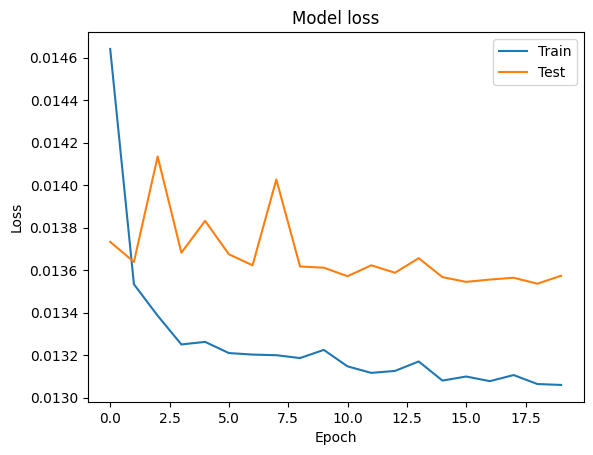

In [22]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss:", test_loss)

# Plot learning curves
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Reshape predictions and test values (if needed) for easier comparison
y_pred = y_pred.flatten()
y_test_flat = y_test.flatten()

# Display the first few predictions and actual values
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test_flat[i]}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Predicted: 0.14030589163303375, Actual: 0.056338028169014086
Predicted: 0.11502769589424133, Actual: 0.12535211267605634
Predicted: 0.1358487904071808, Actual: 0.02816901408450704
Predicted: 0.10228924453258514, Actual: 0.04647887323943661
Predicted: 0.11924652755260468, Actual: 0.1267605633802817


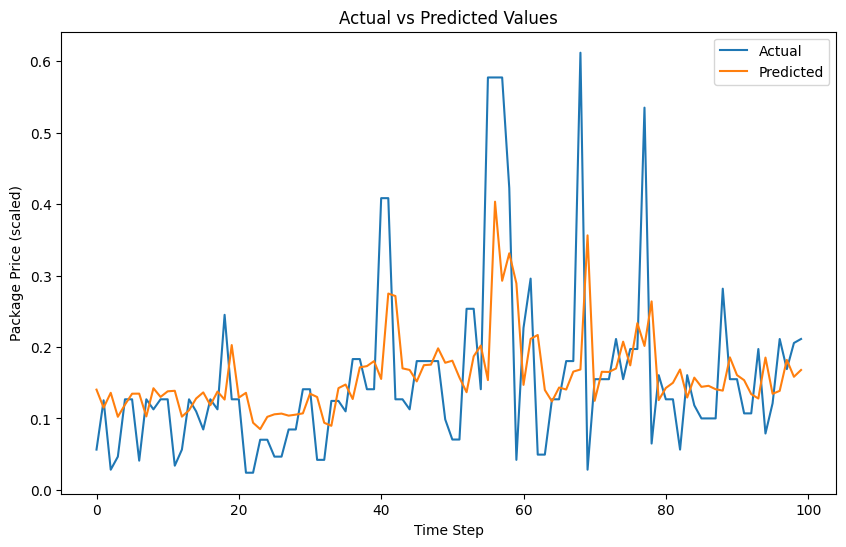

In [24]:
import matplotlib.pyplot as plt

# Plot the first 100 actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test_flat[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Package Price (scaled)')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test_flat, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R² score
r2 = r2_score(y_test_flat, y_pred)
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.07401765356272104
Root Mean Squared Error (RMSE): 0.1165041896584511
R² Score: 0.13705584850506014
